ML models predicting survival on titanic

In [150]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt


In [151]:
titanic = pd.read_csv('tested.csv')

In [152]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Database description

In [153]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


First 5 rows from database

In [154]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


All columns

In [155]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Checking if there are missing values

In [156]:
titanic.loc[pd.isnull(titanic.Age)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,902,0,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S
22,914,1,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S
29,921,0,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C
33,925,1,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
36,928,1,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
408,1300,1,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
410,1302,1,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [157]:
titanic.loc[pd.isnull(titanic.Fare)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,0,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [158]:
titanic.loc[pd.isnull(titanic.Cabin)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Filling missing values

In [159]:
titanic.Age.fillna('Unknown')
titanic.Fare.fillna('Unknown')

0       7.8292
1            7
2       9.6875
3       8.6625
4      12.2875
        ...   
413       8.05
414      108.9
415       7.25
416       8.05
417    22.3583
Name: Fare, Length: 418, dtype: object

Droping Cabin column because missing values are almost all 

In [160]:
titanic.drop(columns='Cabin')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


Analyzing Data by plots

Bar plot - Survived based on age and sex

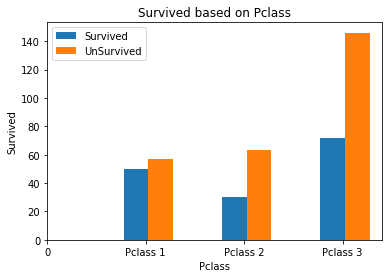

In [161]:
Class1_s = titanic.loc[(titanic.Pclass == 1) & (titanic.Survived == 1), ['Pclass']].size
Class1_uns = titanic.loc[(titanic.Pclass == 1) & (titanic.Survived == 0), ['Pclass']].size

Class2_s = titanic.loc[(titanic.Pclass == 2) & (titanic.Survived == 1), ['Pclass']].size
Class2_uns = titanic.loc[(titanic.Pclass == 2) & (titanic.Survived == 0), ['Pclass']].size

Class3_s = titanic.loc[(titanic.Pclass == 3) & (titanic.Survived == 1), ['Pclass']].size
Class3_uns = titanic.loc[(titanic.Pclass == 3) & (titanic.Survived == 0), ['Pclass']].size

Survived = [Class1_s, Class2_s, Class3_s]
x_axis1= [1, 2, 3]
x_axis2 = [x + barWidth for x in x_axis1]
UnSurvived = [Class1_uns, Class2_uns, Class3_uns]

barWidth = 0.25
fig = plt.subplots()

plt.bar(x_axis1, Survived, width=barWidth, label='Survived')
plt.bar(x_axis2, UnSurvived, width=barWidth, label='UnSurvived')
plt.xticks([r + 0.1 for r in range(len(x_axis1)+1)], ['0', 'Pclass 1', 'Pclass 2', 'Pclass 3'])
plt.ylabel("Survived")
plt.xlabel('Pclass')
plt.title('Survived based on Pclass')
plt.legend()

Replacing Sex into int val for model

In [164]:
titanic.Sex.replace(to_replace='male',value=1, inplace=True)
titanic.Sex.replace(to_replace='female', value=2, inplace=True)
titanic.Sex.replace(to_replace='Unknown', value=0, inplace=True)
titanic.Age.replace(to_replace=np.NaN, value=titanic.Age.median(), inplace=True)

Decision Tree Classifier

In [172]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

features = ['Sex', 'Age', 'Pclass']

X = titanic[features]
y = titanic.Survived

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.8)

dec_tree_model = DecisionTreeClassifier()


dec_tree_model = DecisionTreeClassifier(random_state=1)
dec_tree_model.fit(train_X, train_y)
pred_dec_tree = dec_tree_model.predict(val_X)

print(val_y)
print(pred_dec_tree)

407    0
358    0
342    0
389    0
299    0
      ..
351    0
200    1
145    0
306    0
25     0
Name: Survived, Length: 335, dtype: int64
[0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0
 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 1 0
 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0
 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0
 0 0]


Random Forest

In [176]:
rn_forest_model = RandomForestClassifier(random_state=1)
rn_forest_model.fit(train_X, train_y)
pred_rn_forest = rn_forest_model.predict(val_X)

print(val_y)
print(pred_rn_forest)
print("MAE for Random Forest: {0}".format(mean_absolute_error(val_y, pred_rn_forest)))

407    0
358    0
342    0
389    0
299    0
      ..
351    0
200    1
145    0
306    0
25     0
Name: Survived, Length: 335, dtype: int64
[0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0
 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 1 0
 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0
 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0
 0 0]
MAE for Random Forest: 0.0


SVC

In [175]:
svc_model = SVC(random_state=1)
svc_model.fit(train_X, train_y)
pred_svc = svc_model.predict(val_X)

print(val_y)
print(pred_svc)
print("MAE for SVC: {0}".format(mean_absolute_error(val_y, pred_svc)))

407    0
358    0
342    0
389    0
299    0
      ..
351    0
200    1
145    0
306    0
25     0
Name: Survived, Length: 335, dtype: int64
[1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1]
MAE: 0.373134328358209
